In [12]:
from pathlib import Path

path_crud = Path(
    "../../Static Analysis/impl-crud/crud_chidamber-kemerer.csv")

path_cqrs = Path(
    "../../Static Analysis/impl-es-cqrs/es-cqrs-chidamber-kemerer.csv"
)

In [13]:

from prepare_data import get_dataframe

crud = get_dataframe(
    Path("../../Static Analysis/impl-crud/crud_chidamber-kemerer.csv"),
    application="CRUD"
)
cqrs = get_dataframe(
    Path("../../Static Analysis/impl-es-cqrs/es-cqrs-chidamber-kemerer.csv"),
    application="ES CQRS"
)

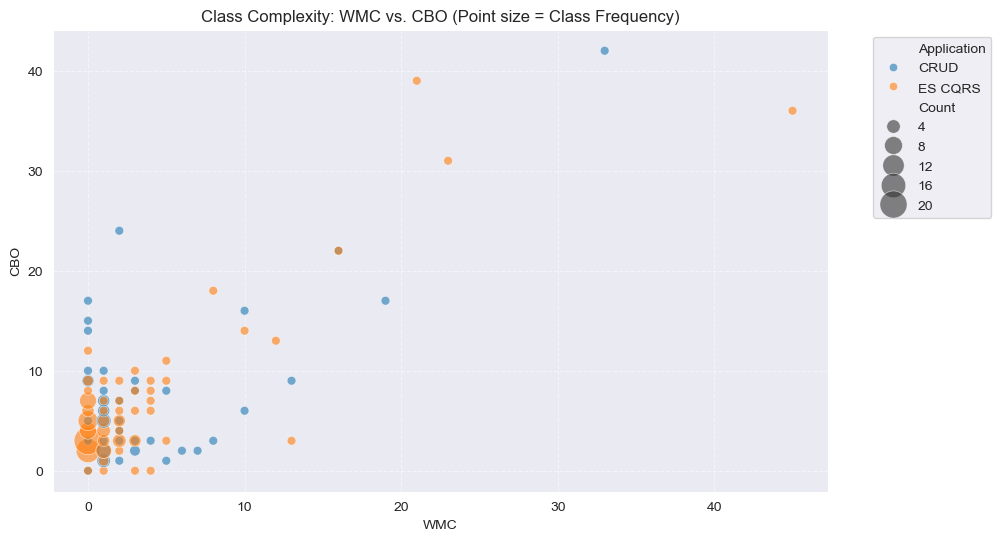

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

concat = pd.concat([crud, cqrs])

# 2. Group by coordinates and dataset to find the "weight" (count) of each point
plot_data = concat.groupby(['WMC', 'CBO', 'Application']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_data,
    x='WMC',
    y='CBO',
    hue='Application',
    size='Count',
    sizes=(40, 400),  # Range of point sizes
    alpha=0.6,  # Transparency helps see overlaps even better
)

plt.title('Class Complexity: WMC vs. CBO (Point size = Class Frequency)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()